# Analyzing the Impact of Social Media Usage on Suicide Rates
## A Predictive Modeling Approach

# 1. Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset

In [5]:
df = pd.read_csv('df.csv')
df

,year,sex,Suicide Rate % change since 2010,Twitter user count % change since 2010,Facebook user count % change since 2010
0,2010,BTSX,100.000000,100.000000,100.000000
1,2010,FMLE,100.000000,100.000000,100.000000
2,2010,MLE,100.000000,100.000000,100.000000
3,2011,BTSX,98.681894,216.666667,138.980263
4,2011,FMLE,98.183773,216.666667,138.980263
5,2011,MLE,98.795530,216.666667,138.980263
6,2012,BTSX,98.595123,342.592593,173.684211
7,2012,FMLE,97.653750,342.592593,173.684211
8,2012,MLE,98.857511,342.592593,173.684211
9,2013,BTSX,97.119135,446.296296,201.973684


# 3. Exploratory Data Analysis

In [7]:
# Display the first 10 rows of the datasets:
df.head(10)

,year,sex,Suicide Rate % change since 2010,Twitter user count % change since 2010,Facebook user count % change since 2010
0,2010,BTSX,100.000000,100.000000,100.000000
1,2010,FMLE,100.000000,100.000000,100.000000
2,2010,MLE,100.000000,100.000000,100.000000
3,2011,BTSX,98.681894,216.666667,138.980263
4,2011,FMLE,98.183773,216.666667,138.980263
5,2011,MLE,98.795530,216.666667,138.980263
6,2012,BTSX,98.595123,342.592593,173.684211
7,2012,FMLE,97.653750,342.592593,173.684211
8,2012,MLE,98.857511,342.592593,173.684211
9,2013,BTSX,97.119135,446.296296,201.973684


In [8]:
#Display the information of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     30 non-null     int64  
 1   sex                                      30 non-null     object 
 2   Suicide Rate % change since 2010         30 non-null     float64
 3   Twitter user count % change since 2010   30 non-null     float64
 4   Facebook user count % change since 2010  30 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB


In [9]:
#Check for missing values of the dataset:
df.isnull().sum()

year                                       0
sex                                        0
Suicide Rate % change since 2010           0
Twitter user count % change since 2010     0
Facebook user count % change since 2010    0
dtype: int64

In [10]:
#Summary statistic of numerical columns
df.describe()

,year,Suicide Rate % change since 2010,Twitter user count % change since 2010,Facebook user count % change since 2010
count,30.000000,30.000000,30.000000,30.000000
mean,2014.500000,93.837274,462.777778,255.394737
std,2.921384,4.688130,177.734769,101.498351
min,2010.000000,85.269171,100.000000,100.000000
25%,2012.000000,89.530913,342.592593,173.684211
50%,2014.500000,94.478128,549.074074,245.394737
75%,2017.000000,98.051267,594.444444,350.164474
max,2019.000000,100.000000,629.629630,410.855263


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


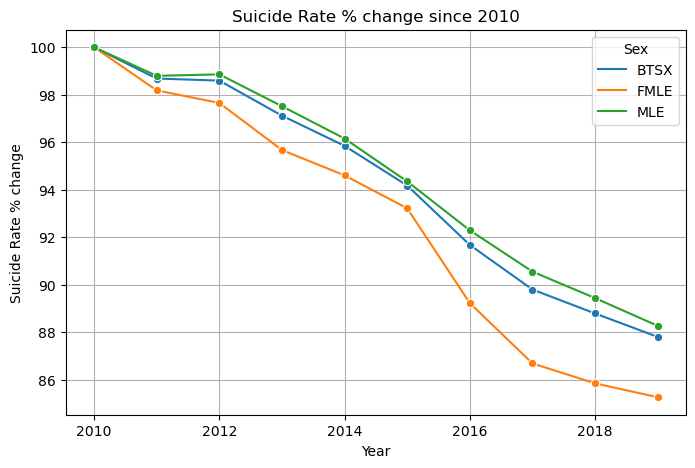

In [11]:
#Plotting the change in suicide rate over the year
plt.figure(figsize=(8, 5))
sns.lineplot(data = df, x = 'year', y = 'Suicide Rate % change since 2010', hue = 'sex', marker = 'o')
plt.title('Suicide Rate % change since 2010')
plt.ylabel('Suicide Rate % change')
plt.xlabel('Year')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

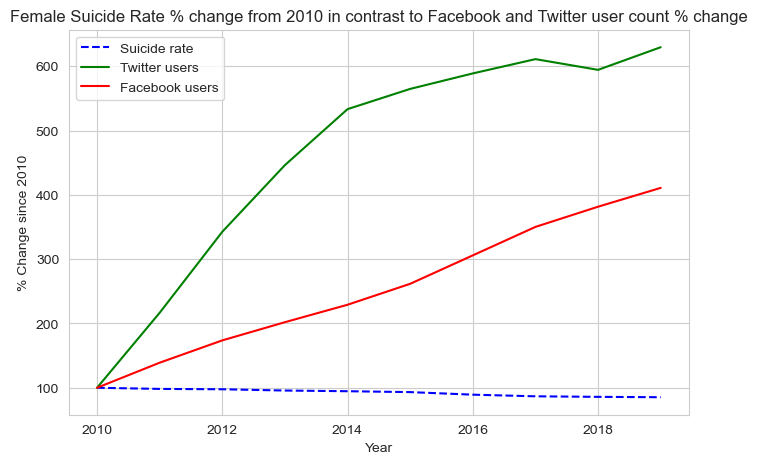

In [12]:
# Filter to only include 'FMLE' for visualization purposes
df_fmle = df[df['sex'] == 'FMLE']

# Plotting
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

plt.plot(df_fmle['year'], df_fmle['Suicide Rate % change since 2010'], 'b--', label='Suicide rate')
plt.plot(df_fmle['year'], df_fmle['Twitter user count % change since 2010'], 'g-', label='Twitter users')
plt.plot(df_fmle['year'], df_fmle['Facebook user count % change since 2010'], 'r-', label='Facebook users')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('% Change since 2010')
plt.title('Female Suicide Rate % change from 2010 in contrast to Facebook and Twitter user count % change')
plt.legend()

# Show the plot
plt.show()

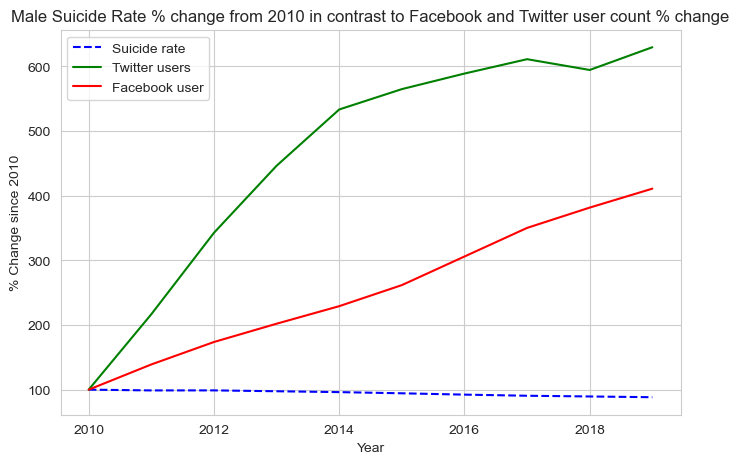

In [13]:
# Filter to only include 'MLE' for visualization purposes
df_mle = df[df['sex'] == 'MLE']
# Plotting
plt.figure(figsize=(8,5))
sns.set_style=("whitegrid")

plt.plot(df_mle['year'],df_mle['Suicide Rate % change since 2010'],'b--', label='Suicide rate')
plt.plot(df_mle['year'],df_mle['Twitter user count % change since 2010'],'g-', label='Twitter users')
plt.plot(df_mle['year'],df_mle['Facebook user count % change since 2010'],'r-', label='Facebook user')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('% Change since 2010')
plt.title('Male Suicide Rate % change from 2010 in contrast to Facebook and Twitter user count % change')
plt.legend()
# Show the plot
plt.show()

# 4. Visualize Distribution of Variables

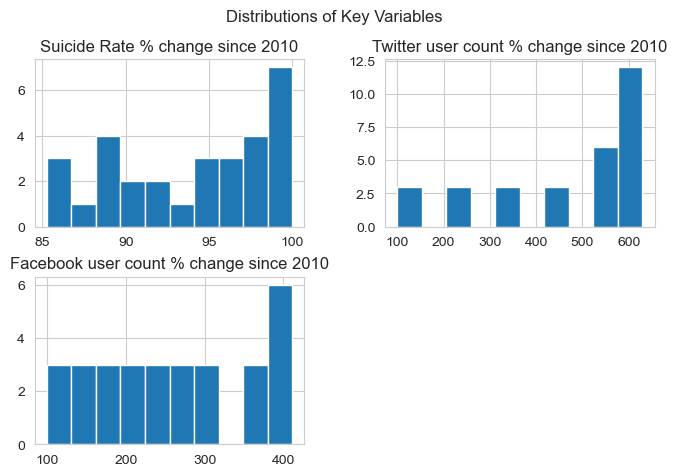

In [15]:
# Plot histograms of the numerical variables

df[['Suicide Rate % change since 2010','Twitter user count % change since 2010','Facebook user count % change since 2010']].hist(bins=10, figsize=(8,5))

plt.suptitle("Distributions of Key Variables")

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


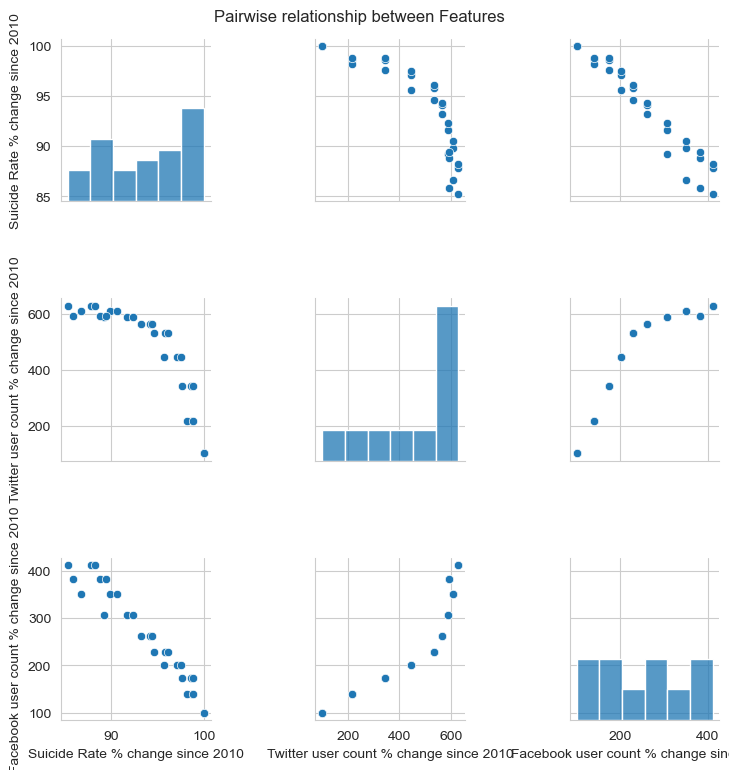

In [16]:
# Pairplot to see the relationship vetween variables
sns.pairplot(df[['Suicide Rate % change since 2010','Twitter user count % change since 2010','Facebook user count % change since 2010']])

plt.subplots_adjust(hspace=0.6, wspace=0.7)  # Adjust these values as needed

plt.suptitle("Pairwise relationship between Features", y = 1.02)

plt.show()

# 5.Correlation Heatmap
To understand correlation between the features, I create a heatmap

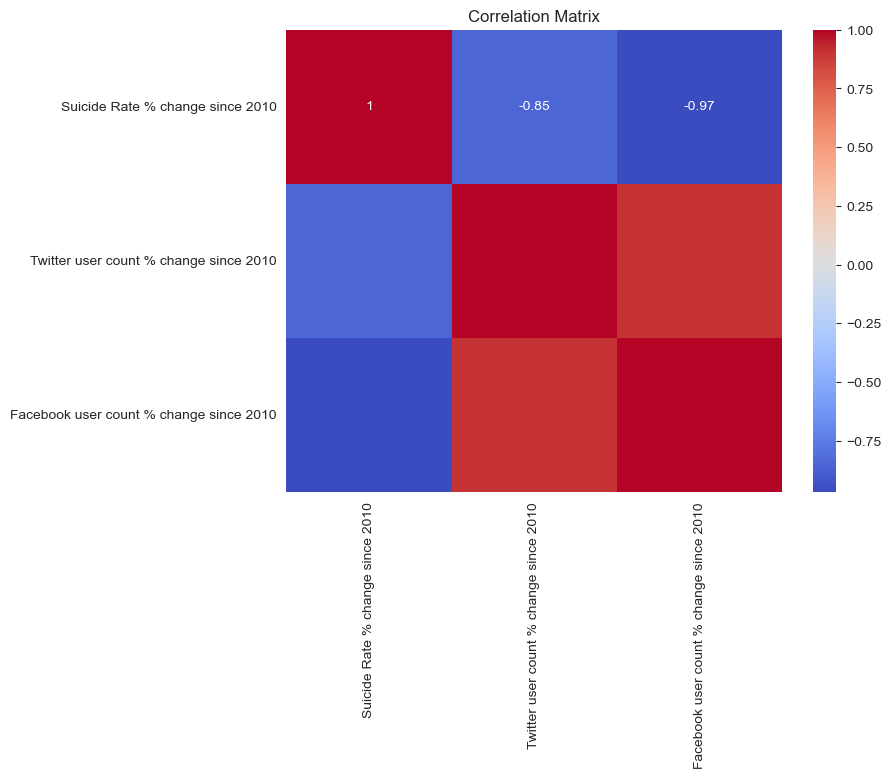

In [18]:
# Plot correlation heatmap

plt.figure(figsize=(8, 6))

sns.heatmap(df[['Suicide Rate % change since 2010', 'Twitter user count % change since 2010', 'Facebook user count % change since 2010']].corr(), annot=True, cmap='coolwarm')

plt.title("Correlation Matrix")

plt.show()

# 6. Feature Engineering and Selection¶
a) Create Behaviral Features Based On Social Media Usage: categorize users based on their social media activity (Twitter and Facebook user growth), creating new behavioral features

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


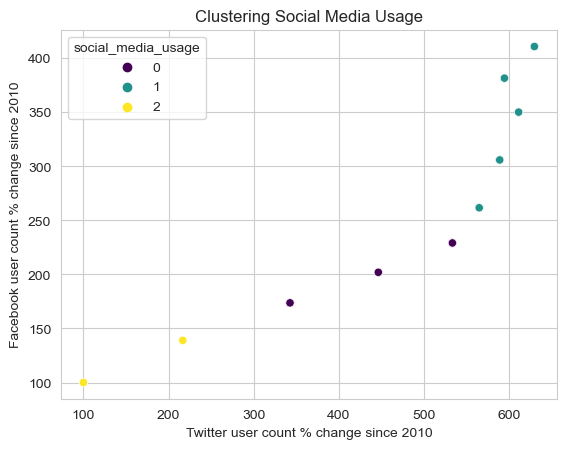

In [28]:
#Import Scikit-learn libraries
from sklearn.cluster import KMeans

#Select relevant features for clustering
usage_features = df[['Twitter user count % change since 2010', 'Facebook user count % change since 2010']]

#KMeans Clustering to categorize into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
df['social_media_usage']= kmeans.fit_predict(usage_features)

#Visualizing the Clustering
sns.scatterplot(data=df, x='Twitter user count % change since 2010', y='Facebook user count % change since 2010', hue = 'social_media_usage', palette = 'viridis')

plt.title("Clustering Social Media Usage")

plt.show()

# 7. Dimensionality Reduction with PCA
Principal Component Analysis (PCA) can help reduce dimentionality and capture the most important components.

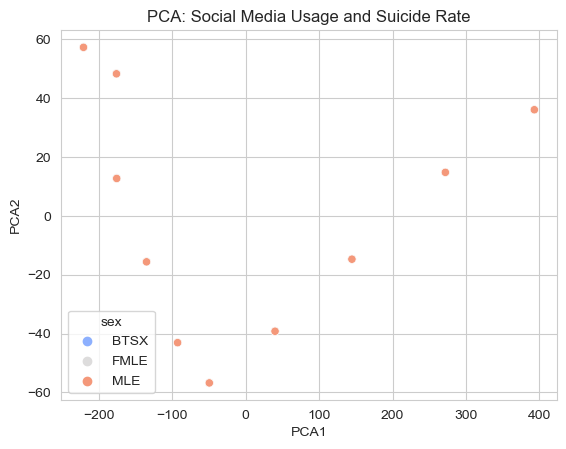

In [30]:
from sklearn.decomposition import PCA

#apply PCA to reduce dimentions
pca = PCA(n_components = 2)
pca_features = pca.fit_transform(df[['Twitter user count % change since 2010','Facebook user count % change since 2010', 'Suicide Rate % change since 2010']])
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

# Visualize PCA results
sns.scatterplot(x='PCA1', y='PCA2', hue='sex', data=df, palette='coolwarm')
plt.title("PCA: Social Media Usage and Suicide Rate")
plt.show()

# 7. Machine Learning Models
a. Prepare Train and Test Data
I will split the data into training and testing sets for modeling

In [32]:
#Import train_test_split library to split the data
from sklearn.model_selection import train_test_split

#Define features and target variable
X = df[['Twitter user count % change since 2010',
        'Facebook user count % change since 2010',
        'PCA1', 'PCA2', 'social_media_usage']]

y = df['Suicide Rate % change since 2010']

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Build and Train Model

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gbm = GradientBoostingRegressor()

# Train the model
gbm.fit(X_train, y_train)

# Make predictions
y_pred = gbm.predict(X_test)

# 9. Model Evaluation and Interpretation

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate performance of Gradient Boosting Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.5414120171632623
R2 Score: 0.961079005036602


# 10.Feature Importance with SHAP
To interpret the model, I can use SHAP (SHapley Additive exPlanations) to identify which features are most important in predicting suicide rates.

In [44]:
import sys
print(sys.executable)
!{sys.executable} -m pip install shap
!pip install shap

/opt/anaconda3/bin/python
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.3/459.3 kB 12.6 MB/s eta 0:00:0000:01
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)


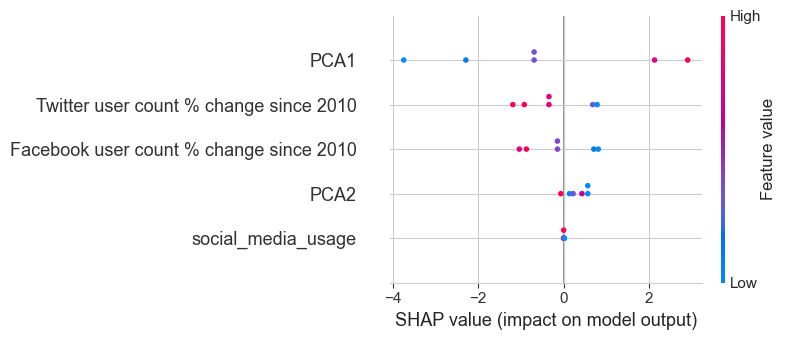

In [46]:
import shap
# SHAP values for Gradient Boosting Model

explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test)

# Reporting and Conclusion
## Data Overview and EDA Insights
The dataset contains 30 records with the following columns: year, sex, Suicide Rate % change since 2010, Twitter user count % change since 2010, and Facebook user count % change since 2010. The data covers years from 2010 to 2019, providing insights into the trends of suicide rates and social media usage (specifically Twitter and Facebook) over this period.

## The summary statistics show the following key points:

- The mean suicide rate change since 2010 is approximately 93.84%, with a minimum of 85.27% and a maximum of 100%. The standard deviation is low (around 4.69), indicating relatively stable values.

- The mean percentage change in Twitter users is 462.78%, with values ranging from 100% to 629.63%, and a standard deviation of 177.73%. This suggests significant growth in Twitter usage.

- The mean percentage change in Facebook users is 255.39%, with a range from 100% to 410.86%, showing a more moderate but still notable growth.

- From the correlation matrix and trends observed in the dataset, it is evident that Facebook user growth consistently outpaces Twitter user growth over the years, indicating a stronger influence of Facebook on the population in terms of user adoption.

## Clustering Analysis with KMeans
Using KMeans clustering with two social media metrics (Twitter and Facebook user growth), the dataset was divided into three clusters, representing different user behavior patterns:

- Cluster 0 (3 records): A group with lower growth in both Twitter and Facebook user counts.

- Cluster 1 (5 records): A group exhibiting moderate to high growth in both Twitter and Facebook user counts.

- Cluster 2 (2 records): A group with the highest growth in Facebook users but moderate growth in Twitter users.

This clustering helps identify distinct social media user behaviors, which can be valuable for further analysis or targeted interventions in mental health awareness campaigns.

## PCA and Visualizing Social Media Usage and Suicide Rates
Principal Component Analysis (PCA) was applied to reduce dimensionality and visualize the relationships between social media usage and suicide rates. The following findings were observed:

- PCA1: The first principal component captured the most variation in the data, heavily influenced by social media usage patterns (Twitter and Facebook). It explained the largest portion of the variance, highlighting the relationship between social media growth and suicide rate changes.

- PCA2: The second principal component, though less significant, also played a role in explaining the variance in suicide rates, with a lesser influence than PCA1.

The scatter plot of PCA1 and PCA2 shows that social media usage, particularly Facebook, plays a dominant role in the observed trends.

## Model Performance
To evaluate the predictive capabilities of the model, a Gradient Boosting Regressor was trained using the features related to social media usage and the PCA components. The performance was evaluated based on the following metrics:

- Mean Squared Error (MSE): 0.5414, which is quite low, indicating that the model's predictions are close to the actual values.

- R² Score: 0.9611, which shows that the model explains 96.11% of the variance in the suicide rate percentage change, suggesting an excellent fit.

These results confirm that social media usage, particularly the changes in Twitter and Facebook user counts, is a strong predictor of changes in suicide rates.

## Feature Importance Using SHAP
SHAP (SHapley Additive exPlanations) values were used to interpret the importance of each feature in predicting suicide rates. The feature importance ranking is as follows:

- PCA1: The first principal component emerged as the most important feature in predicting suicide rates, reflecting the combined influence of both social media metrics.

- Twitter user count % change since 2010: Twitter user growth showed a significant impact, with higher growth correlating to more significant changes in suicide rates.

- PCA2: The second principal component, although important, played a smaller role compared to PCA1 and Twitter usage.

- Facebook user count % change since 2010: Facebook user growth was less influential than Twitter user growth in the model, though it still contributed to the overall prediction.

- Social_media_usage: This feature, derived from clustering, was the least influential in predicting suicide rates but still added some predictive value.

These insights suggest that social media behaviors, especially Twitter growth, combined with the overall social media usage pattern, can significantly help predict trends in suicide rates.

## Conclusion
The analysis demonstrates a strong correlation between social media usage (Twitter and Facebook) and changes in suicide rates, with social media growth acting as a predictor of mental health trends. The model performed exceptionally well, with an R² score of 96.11%, showcasing the potential of social media metrics in predicting suicide rates. The use of SHAP values further emphasizes the importance of social media usage, particularly Twitter, in understanding these trends.

Future studies could further refine the model by incorporating other factors, such as demographic and psychological variables, to improve its predictive accuracy and ensure its applicability in real-world settings. Additionally, the ethical implications of using such models in mental health interventions should be carefully considered, ensuring that predictions are used responsibly and with caution.